importing library

In [102]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

loading dataset

In [103]:
df=pd.read_csv('iris.csv')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [104]:
df.shape

(150, 5)

we have 150 rows and 5 columns

In [105]:
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

there is 4 float value and only is object

finding the missing values

In [36]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

there is not missing value

In [37]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

there are 3 unique values

In [38]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

in three classes there are equal value count

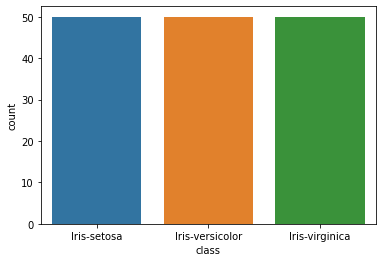

In [39]:
sn.countplot(df['class']);

this countplot showing classes have equal value

# EDA

# univariant analysis

<AxesSubplot:xlabel='sepal length', ylabel='Density'>

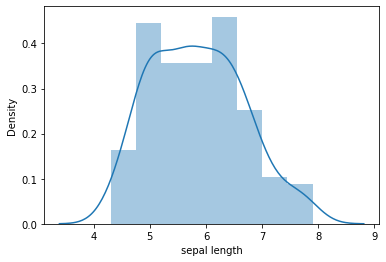

In [40]:
sn.distplot(df["sepal length"])

i got sepal length is normaly distributed

<AxesSubplot:xlabel='sepal width', ylabel='Density'>

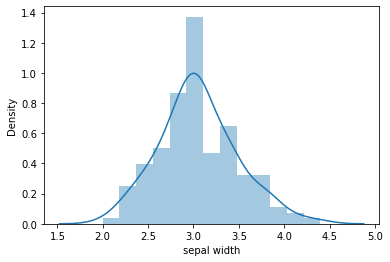

In [41]:
sn.distplot(df["sepal width"])

sepal width is also normaly distributed in countplot

<AxesSubplot:xlabel='petal length', ylabel='Density'>

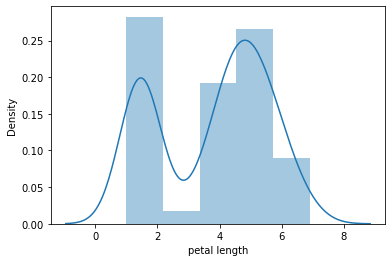

In [42]:
sn.distplot(df["petal length"])

in petal length countplot is not normaly disributed

<AxesSubplot:xlabel='petal width', ylabel='Density'>

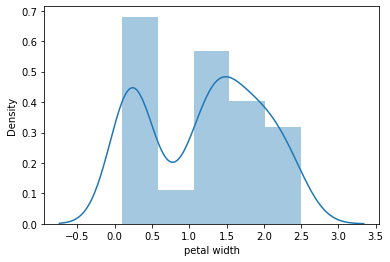

In [43]:
sn.distplot(df["petal width"])

i got petal width is not normaly distributed in countplot

outlier ckecking

<AxesSubplot:xlabel='sepal length'>

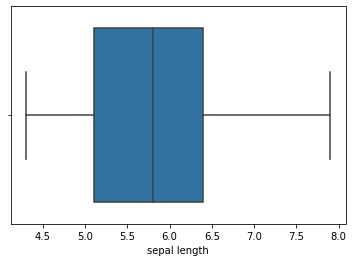

In [44]:
sn.boxplot(df["sepal length"])

there is no outlier

<AxesSubplot:xlabel='sepal width'>

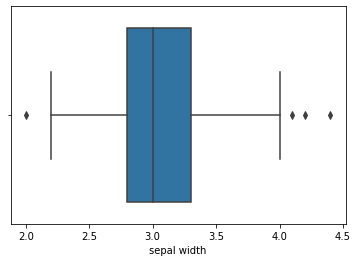

In [45]:
sn.boxplot(df["sepal width"])

there is outlier

<AxesSubplot:xlabel='petal length'>

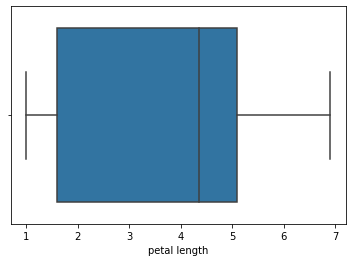

In [46]:
sn.boxplot(df["petal length"])

there is no outlier

<AxesSubplot:xlabel='petal width'>

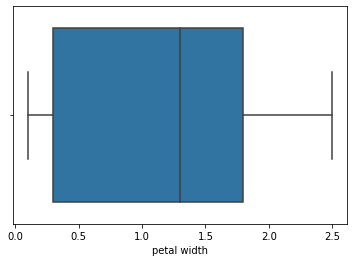

In [47]:
sn.boxplot(df["petal width"])

there is no outlier

# Bivariant analysis

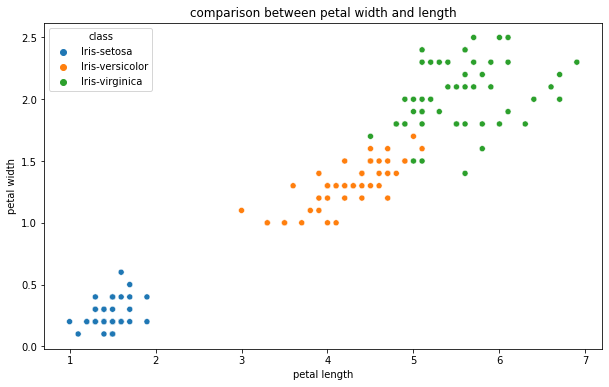

In [48]:
plt.figure(figsize=[10,6])
plt.title('comparison between petal width and length')
sn.scatterplot(df['petal length'],df['petal width'],hue=df["class"]);

i found iris setosa is least growth and iris virginica have maximum growth

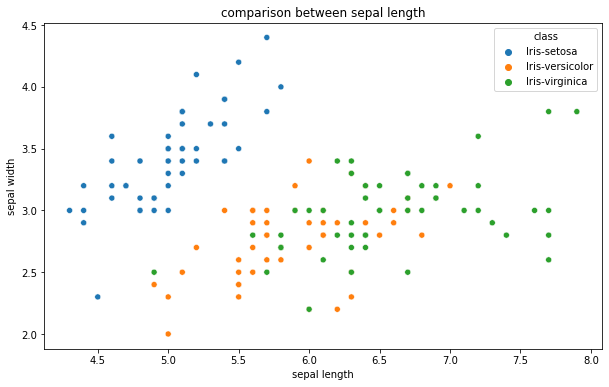

In [49]:
plt.figure(figsize=[10,6])
plt.title('comparison between sepal length')
sn.scatterplot(df['sepal length'],df['sepal width'],hue=df["class"]);

sepal length and sepal width spreaded in this scatter plot

# multivariant analysis

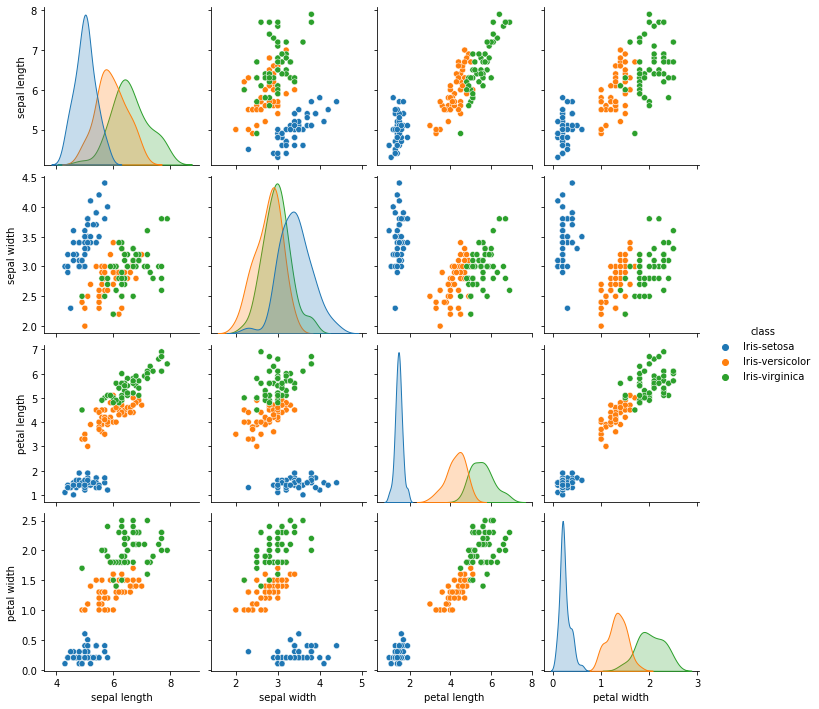

In [50]:
sn.pairplot(df,hue="class")

these plots showing diffrence between classes

# correlation matrix

In [58]:
cor=df.corr()

In [59]:
cor

,sepal length,sepal width,petal length,petal width,class
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

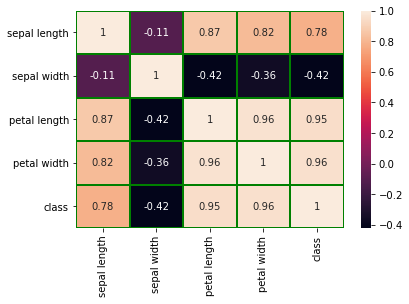

In [60]:
sn.heatmap(cor,annot=True,linewidths=1,linecolor='green')

light color shows strong relationship between classes and dark color shows weak relationship between classes

# changing the rows in numerical form

In [54]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["class"]=LE.fit_transform(df["class"])

In [55]:
df["class"].unique()

array([0, 1, 2])

classes are change in to numerical form

In [56]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

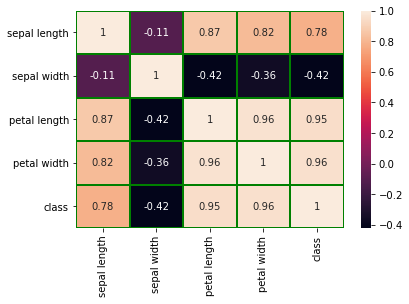

In [61]:
sn.heatmap(cor,annot=True,linewidths=1,linecolor='green')

these plot showing the relation between sepal width and length and petal width and length with class

# finding the missing value

In [106]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

no missing value

outlier removal

In [63]:
df["sepal width"]=df["sepal width"].fillna(df["sepal width"].mean())
df["petal width"]=df["petal width"].fillna(df["petal width"].median())

sepal width and length normaly distributed so using mean
petal width and length not normaly distributed so using median

In [64]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(df))

new_df=df[(z<3).all(axis=1)]

In [66]:
new_df.shape

(149, 5)

after removing outlier 1 row is deleted
and the new shape is 149 rows and 5 columns

In [67]:
df.shape

(150, 5)

In [68]:
(1/150)

0.006666666666666667

# checking skewness

In [69]:
df.skew()

sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
class           0.000000
dtype: float64

there is no skewness

In [70]:
x=new_df.drop("class",axis=1)
y=new_df["class"]

changing the data in to x and y form

checking the accuracy score by different type of classifier

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [100]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,2):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred= mod.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    print("Best accuracy is", maxAccu,"on Random_state",maxRS)

Best accuracy is 0.9555555555555556 on Random_state 1


there is best accuracy is 95% at one random state

In [107]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=.30,random_state=6)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [80]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94        17
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



there is 96% accuracy in dtc

In [81]:
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
pred= rfc.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



there is 98% accuracy score in rfc

In [82]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



there is 100% accuracy score in svc

In [84]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc,x,y,cv=5).mean())

0.9666666666666668


In [85]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.9666666666666668


In [86]:
print(cross_val_score(sv,x,y,cv=5).mean())

0.9666666666666666


after performing crossvalidation i got least diffrence in dtc and maximum diffrencw between svc
our best accuracy score is 95% becouse it has least diffrence

# hyper parameter tuning

In [88]:
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(2,10),
          'criterion':['gini','entropy']}

In [89]:
gcv=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [90]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [108]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 4}

after performing hyperparametertuning best criterion is gini have max depth is 4

In [110]:
final_mod=DecisionTreeClassifier(criterion='gini',max_depth=4)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

95.55555555555556


so dtc is the best model 

In [111]:
import joblib
joblib.dump(final_mod,"FinalModel.pkl")


['FinalModel.pkl']

saving the model